<a href="https://www.kaggle.com/code/niramay/diabetes-predictor?scriptVersionId=105074651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
all_data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
all_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Target Variable distribution 
all_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


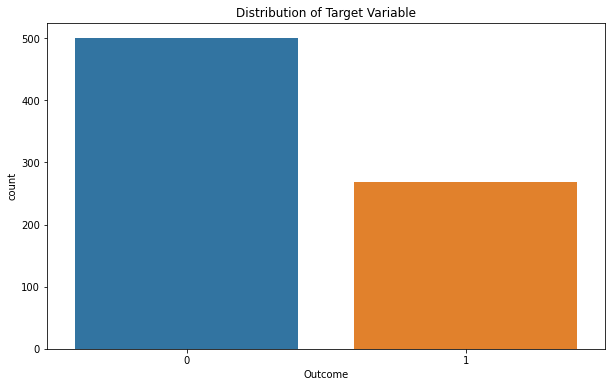

In [4]:
plt.figure(figsize = (10,6))
sns.countplot('Outcome',data=all_data).set_title('Distribution of Target Variable')
plt.show()

The target variable(Outcome) has an imbalanced distribution of independent variables. This might influence the performance of our model negatively.

In [5]:
# Examine missing values

all_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We do not have any missing values in this dataset which means we do not need any imputation before training the model

In [6]:
# Examining data types 
all_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

All our columns have integer values, except two,BMI and DiabetesPedigreeFunction which are both float.

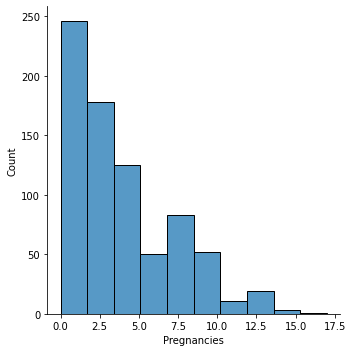

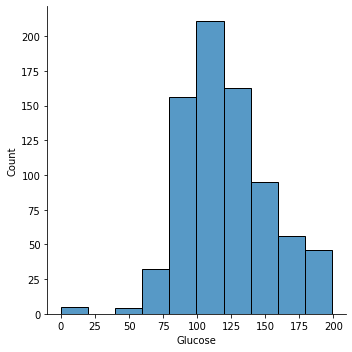

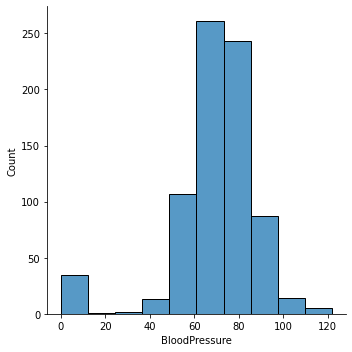

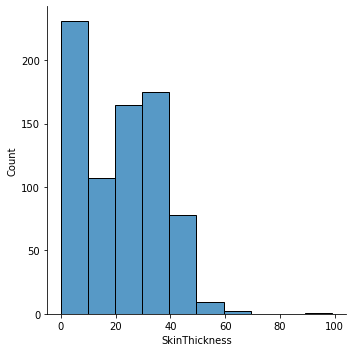

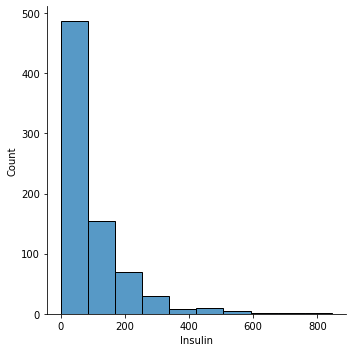

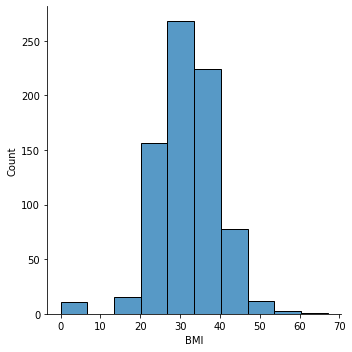

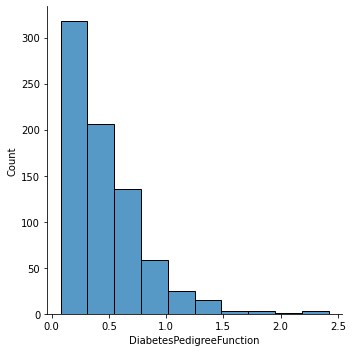

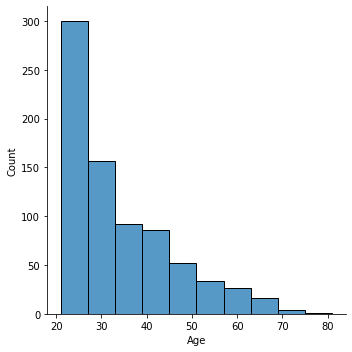

In [7]:
# Examining data distributions 
features = np.array(all_data.columns)
features = np.delete(features, -1)
for feature in features:
    sns.displot(data=all_data, x=feature, kind = 'hist',bins = 10)

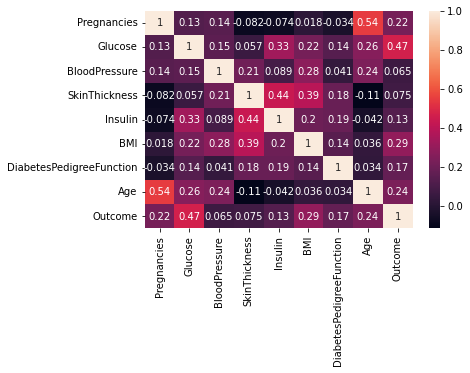

In [8]:
# Examining data intercorrelations
correlation_matrix = all_data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

After plotting a heatmap of the correlation matrix, we can observe that Glucose has the highest correlation with Outcome among all the features.

Now lets do some preprocessing before we make train and test splits so that the data is ready for training the logistic regression model.